In [860]:
%matplotlib inline
import matplotlib.pyplot as pl
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
import seaborn as sns

import numpy as np
import pandas as pd
from tqdm import tqdm

# A few useful constants
KEPLER_BEGIN_BK, KEPLER_END_BK = 130, 1582

In [861]:
transits = pd.read_hdf('observed-long-period-transits.h5', key='transits')
transits = transits[transits.tce_max_mult_ev < 20]

In [862]:
AGRESSIVITY = 'least_agressive'
thresholds = pd.read_hdf('transit-rate-by-skygroup-with-threshold-{}.h5'.format(AGRESSIVITY), key='rate')

In [863]:
transits['day_single'] = np.floor(transits.transit_time_x).astype('int')
transits['day_quart'] = 0.25 * np.floor(transits.transit_time_x * 4)
transits['day_half'] = 0.5 * np.floor(transits.transit_time_x * 2)
transits['day_double'] = (2 * np.floor(transits.transit_time_x * 0.5)).astype('int')
transits.head()

,kepid_x,tce,tce_max_mult_ev,tce_period,tce_plnt_num,transit_time_x,quarter,season,channel,idx,kepid_y,module,output,skygroup,transit_time_y,day_single,day_quart,day_half,day_double
0,2304168,002304168-02,12.22,431.719,2,219.298,2,0,4,0,2304168,2,4,84,219.298,219,219.25,219.0,218
1,2304168,002304168-02,12.22,431.719,2,651.017,7,1,56,1,2304168,16,4,84,651.017,651,651.00,651.0,650
2,2304168,002304168-02,12.22,431.719,2,1082.736,11,1,56,2,2304168,16,4,84,1082.736,1082,1082.50,1082.5,1082
3,2304168,002304168-02,12.22,431.719,2,1514.455,16,2,84,3,2304168,24,4,84,1514.455,1514,1514.25,1514.0,1514
4,2303102,002303102-10,11.51,480.481,10,161.570,1,3,32,4,2303102,10,4,84,161.570,161,161.50,161.5,160


In [864]:
BIN_BY = '_quart'
transit_rate_groupby = transits.groupby(['day' + BIN_BY, 'skygroup', 'season'])
transit_rate = pd.DataFrame(transit_rate_groupby.size(), columns=['transit_rate_observed'])
transit_rate['channel'] = transit_rate_groupby.first().channel
transit_rate['quarter'] = transit_rate_groupby.first().quarter
assert((transit_rate_groupby.first().channel == transit_rate_groupby.mean().channel).all())
assert((transit_rate_groupby.first().quarter == transit_rate_groupby.mean().quarter).all())

In [865]:
threshold_col = []
for day, skygroup, season in transit_rate.index:
    threshold_col.append(thresholds.ix[skygroup, season].transit_rate_threshold)
transit_rate['transit_rate_threshold' + BIN_BY] = threshold_col

In [866]:
transit_rate.head()

transit_rate_observed  channel  quarter  \
day_quart skygroup season                                            
131.50    25       3                           1       17        1   
          59       3                           1       67        1   
          71       3                           1       11        1   
131.75    4        3                           1       56        1   
          37       3                           1       61        1   

                           transit_rate_threshold_quart  
day_quart skygroup season                                
131.50    25       3                                4.0  
          59       3                                5.0  
          71       3                                4.0  
131.75    4        3                                4.0  
          37       3                                5.0

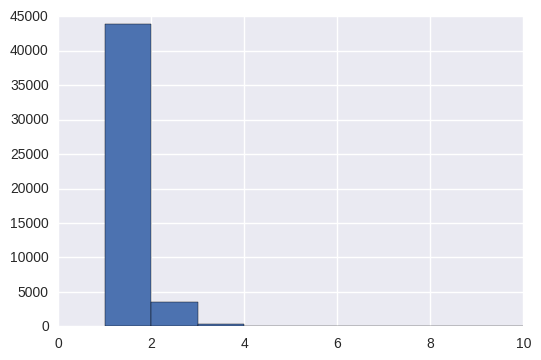

In [867]:
transit_rate.transit_rate_observed.hist(bins=10, range=(0,10))

In [868]:
mask_bad_data = transit_rate.transit_rate_observed >= transit_rate['transit_rate_threshold' + BIN_BY]
mask_bad_data.sum()

153

In [869]:
transit_rate[mask_bad_data]

transit_rate_observed  channel  quarter  \
day_quart skygroup season                                            
140.25    43       3                           7       44        1   
172.00    36       0                           3       52        2   
173.00    36       0                           4       52        2   
184.75    18       0                          10       66        2   
186.25    18       0                           5       66        2   
          58       0                           9       26        2   
230.50    58       0                           5       26        2   
230.75    58       0                           5       26        2   
231.25    58       0                           6       26        2   
232.00    58       0                           5       26        2   
232.25    58       0                          14       26        2   
232.50    58       0                          12       26        2   
232.75    58       0                          24       26        2   
233.00    58       0                          16       26        2   
233.25    58       0                          20       26        2   
233.50    58       0                          15       26        2   
233.75    58       0                          14       26        2   
234.00    58       0                          11       26        2   
234.25    58       0                           5       26        2   
234.50    58       0                           5       26        2   
235.50    58       0                           7       26        2   
235.75    58       0                           6       26        2   
238.50    58       0                           6       26        2   
261.25    41       1                           4       44        3   
295.75    82       1                           5       54        3   
309.75    66       1                           5       58        3   
324.50    41       1                           5       44        3   
346.25    12       1                           3       72        3   
373.50    26       2                           4       26        4   
          70       2                           4       70        4   
...                                          ...      ...      ...   
1338.50   58       0                          16       26       14   
1338.75   58       0                          10       26       14   
1339.00   58       0                           8       26       14   
1339.25   58       0                          11       26       14   
1339.50   58       0                          14       26       14   
1339.75   26       0                           4       58       14   
          58       0                          31       26       14   
1340.00   26       0                           5       58       14   
          58       0                          19       26       14   
1340.25   58       0                          19       26       14   
1340.50   26       0                           4       58       14   
          58       0                          12       26       14   
1340.75   58       0                           5       26       14   
1341.00   58       0                           7       26       14   
1341.25   58       0                          11       26       14   
1341.50   58       0                           6       26       14   
1341.75   58       0                           5       26       14   
1342.00   58       0                           6       26       14   
1342.25   26       0                           4       58       14   
          58       0                          13       26       14   
1342.50   58       0                          11       26       14   
1342.75   58       0                           9       26       14   
1343.00   58       0                          12       26       14   
1366.25   8        0                           3       80       14   
1382.00   41       1                 

In [870]:
transit_rate[mask_bad_data].reset_index().groupby('channel').size().sort_values()

channel
2      1
70     1
67     1
65     1
60     1
81     1
71     1
72     1
49     1
74     1
29     1
27     1
80     1
10     1
50     1
66     2
52     2
54     3
82     4
58    16
44    28
26    83
dtype: int64

In [871]:
mask_transits_flagged = transits.channel > 999
for transit_day, skygroup, season in transit_rate[mask_bad_data].index:
    mask_transits_flagged |= (
                            (transits['day' + BIN_BY] == transit_day) &
                            (transits.skygroup == skygroup) &
                            (transits.season == season)
                         )
mask_transits_flagged.sum()

1312

In [872]:
tces_to_remove = transits[mask_transits_flagged].tce.unique()
tces_to_remove.size

620

In [873]:
mask_transits_to_remove = transits.tce.isin(tces_to_remove)
mask_transits_to_remove.sum()

2378

## What is the daily maximum?

In [874]:
daily_transit_count = transits[~mask_transits_to_remove].groupby('day' + BIN_BY).size()
daily_transit_count.head()

day_quart
131.50    3
131.75    2
132.00    6
132.25    3
132.50    8
dtype: int64

In [875]:
from scipy.stats import binom
n_tces = transits[~mask_transits_to_remove].tce.unique().size
p_transit = daily_transit_count.median() / n_tces
daily_threshold = binom.ppf(1 - 1e-6, int(n_tces), p_transit)
print('n={} p={}'.format(n_tces, p_transit))
daily_threshold

n=10893 p=0.0008262186725419994


26.0

In [876]:
daily_transit_count[daily_transit_count >= daily_threshold]

day_quart
372.75     26
373.50     34
373.75     32
914.50     26
1093.50    26
1093.75    86
1185.00    52
1231.75    56
1232.00    28
1235.50    32
1490.75    26
1561.00    48
1561.25    30
dtype: int64

In [877]:
days_to_remove = daily_transit_count[daily_transit_count > daily_threshold].index
days_to_remove

Float64Index([373.5, 373.75, 1093.75, 1185.0, 1231.75, 1232.0, 1235.5, 1561.0,
              1561.25],
             dtype='float64', name='day_quart')

In [878]:
mask_transits_flagged2 = mask_transits_flagged | transits['day' + BIN_BY].isin(days_to_remove)
mask_transits_flagged2.sum()

1723

In [879]:
tces_to_remove2 = transits[mask_transits_flagged2].tce.unique()
tces_to_remove2.size

1012

In [880]:
mask_transits_to_remove2 = transits.tce.isin(tces_to_remove2)
mask_transits_to_remove2.sum()

4134

## Write output file

In [881]:
output_prefix = 'binomial{}_{}'.format(BIN_BY, AGRESSIVITY)
print(output_prefix)

binomial_quart_least_agressive


In [882]:
"""
with open('halfday-binomial-strict-OPS.txt', 'w') as out:
    out.write('# This file lists transits of long-period (>100 days), low-mes (<20) candidates\n')
    out.write('# which occured on days when an implausibly high number of transits were detected\n')
    out.write('# on the same channel.\n')
    out.write('# 1 = bad transit\n')
    for row in transits[mask_transits_flagged2].sort_values('tce').itertuples():
        out.write('{} {:11.6f} 1\n'.format(row.tce, row.transit_time_x))
"""

"\nwith open('halfday-binomial-strict-OPS.txt', 'w') as out:\n    out.write('# This file lists transits of long-period (>100 days), low-mes (<20) candidates\n')\n    out.write('# which occured on days when an implausibly high number of transits were detected\n')\n    out.write('# on the same channel.\n')\n    out.write('# 1 = bad transit\n')\n    for row in transits[mask_transits_flagged2].sort_values('tce').itertuples():\n        out.write('{} {:11.6f} 1\n'.format(row.tce, row.transit_time_x))\n"

In [883]:
with open(output_prefix + '_definition.txt', 'w') as out:
    out.write('# This file specifies the times (floored bkjd) and skygroups during which\n')
    out.write('# an anomalous number of long-period (>100 days), low-mes (<20) transits were detected.\n')
    out.write('#\n')
    out.write('# bkjd skygroup\n')
    for row in transit_rate[mask_bad_data].reset_index().itertuples():
        out.write('{} {}\n'.format(row.__getattribute__('day' + BIN_BY), row.skygroup))
    for day in days_to_remove:
        for channel in range(1, 85):
            out.write('{} {}\n'.format(day, channel))

''

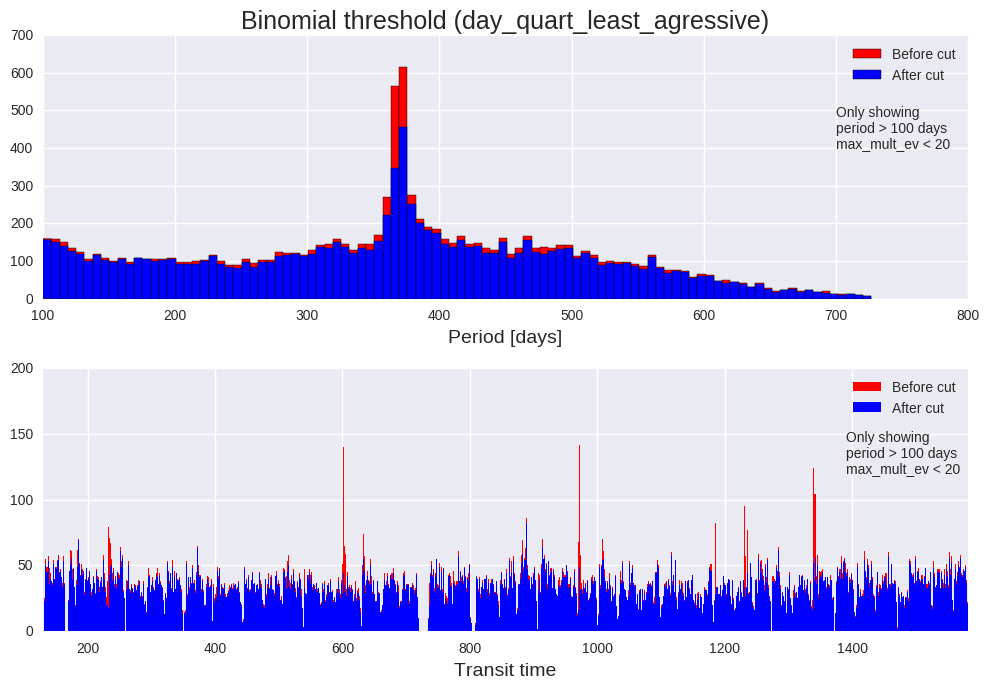

In [884]:
pl.figure(figsize=(10,7))
pl.subplot(211)
_ = pl.hist(transits.groupby('tce').first().tce_period, bins=100, label='Before cut',
            facecolor='red')
_ = pl.hist(transits[~mask_transits_to_remove2].groupby('tce').first().tce_period, bins=100,  label='After cut',
            facecolor='blue')
pl.xlabel('Period [days]', fontsize=14)
pl.legend()
pl.title('Binomial threshold (day{}_{})'.format(BIN_BY, AGRESSIVITY), fontsize=18)
pl.text(700, 400, 'Only showing\nperiod > 100 days\nmax_mult_ev < 20', ha='left')

pl.subplot(212)
_ = pl.hist(transits.transit_time_x,
            lw=0, facecolor='red', label='Before cut',
            bins=(KEPLER_END_BK - KEPLER_BEGIN_BK),
            range=(KEPLER_BEGIN_BK, KEPLER_END_BK))
_ = pl.hist(transits[~mask_transits_to_remove2].transit_time_x,
            lw=0, facecolor='blue', label='After cut',
            bins=(KEPLER_END_BK - KEPLER_BEGIN_BK),
            range=(KEPLER_BEGIN_BK, KEPLER_END_BK))
pl.ylim([0, 200])
pl.xlim([KEPLER_BEGIN_BK, KEPLER_END_BK])
pl.legend()
pl.xlabel('Transit time', fontsize=14)
pl.text(1390, 120, 'Only showing\nperiod > 100 days\nmax_mult_ev < 20', ha='left')
pl.tight_layout()
pl.savefig('{}.png'.format(output_prefix))
""""""

In [885]:
"""
pl.figure(figsize=(10,4))
_ = pl.hist(transits.transit_time_x,
            lw=0, facecolor='red', label='Before',
            bins=(KEPLER_END_BK - KEPLER_BEGIN_BK),
            range=(KEPLER_BEGIN_BK, KEPLER_END_BK))
_ = pl.hist(transits[~mask_transits_to_remove2].transit_time_x,
            lw=0, facecolor='blue', label='After',
            bins=(KEPLER_END_BK - KEPLER_BEGIN_BK),
            range=(KEPLER_BEGIN_BK, KEPLER_END_BK))
pl.ylim([0, 200])
pl.xlim([KEPLER_BEGIN_BK, KEPLER_END_BK])
pl.legend()
pl.xlabel('transit time')
pl.title('Binomial cut for TCEs with period > 100 days and max_mult_ev < 20')
"""

"\npl.figure(figsize=(10,4))\n_ = pl.hist(transits.transit_time_x,\n            lw=0, facecolor='red', label='Before',\n            bins=(KEPLER_END_BK - KEPLER_BEGIN_BK),\n            range=(KEPLER_BEGIN_BK, KEPLER_END_BK))\n_ = pl.hist(transits[~mask_transits_to_remove2].transit_time_x,\n            lw=0, facecolor='blue', label='After',\n            bins=(KEPLER_END_BK - KEPLER_BEGIN_BK),\n            range=(KEPLER_BEGIN_BK, KEPLER_END_BK))\npl.ylim([0, 200])\npl.xlim([KEPLER_BEGIN_BK, KEPLER_END_BK])\npl.legend()\npl.xlabel('transit time')\npl.title('Binomial cut for TCEs with period > 100 days and max_mult_ev < 20')\n"

In [886]:
"""
_ = pl.hist(transits[~mask_transits_to_remove2].transit_time_x,
            bins=(KEPLER_END_BK - KEPLER_BEGIN_BK),
            range=(KEPLER_BEGIN_BK, KEPLER_END_BK))
pl.ylim([0, 200])
"""

'\n_ = pl.hist(transits[~mask_transits_to_remove2].transit_time_x,\n            bins=(KEPLER_END_BK - KEPLER_BEGIN_BK),\n            range=(KEPLER_BEGIN_BK, KEPLER_END_BK))\npl.ylim([0, 200])\n'

In [887]:
#transits.tce_max_mult_ev.hist(bins=30, range=(0,30))

In [888]:
#transits[mask_transits_to_remove].groupby('channel').size()